# AUTOMATING PROCESSING OF THE TRAIN DATA SET AND PREDICTIONS ON THE TEST DATA

In [1]:
#importing dependencies
import sys
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.preprocessing import OrdinalEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor
import xgboost 


In [2]:
sys.path.append ('./modules') #modules folder contains the helper file(a collection of written fuctions). see below

In [3]:
#helper module contains functions created to process the data
from helper import upload_file_csv, case_check, summary_stat, missing_vals, drop_missing,  check_dup, drop_feature, merger, drop_dup
from helper import feat_list, group, color_map, plot_feature_corr, feat_dist
from helper import cat_ord_enc, cat_feat_list, add_binned_feat 
from helper import poly_reg, num_feat_list, use_data, best_model_mse, xg_boost
from helper import upload_file_csv, conv_feat_type, case_check, drop_feature, check_dup, test_ord_enc, num_feat_list, add_binned_feat
from helper import combined_proc_modelling, process_predict_pipe, feature_importance, model_predict

In [4]:
train_features_link = "DSDJ-data-SalaryPredictions/data/train_features.csv"
train_target_link = "DSDJ-data-SalaryPredictions/data/train_salaries.csv"

Checking if case in feature values are uniform
jobId ---> All upppercase
companyId ---> All upppercase
jobType ---> All upppercase
degree ---> All upppercase
major ---> All upppercase
industry ---> All upppercase

Percent missing of total
jobId                  0.0
companyId              0.0
jobType                0.0
degree                 0.0
major                  0.0
industry               0.0
yearsExperience        0.0
milesFromMetropolis    0.0
salary                 0.0
dtype: float64

 Dropped 5 rows with zero salary values
jobId  dropped

 186 duplicates found and removed

 Data encoded
yearsExperience  values binned
milesFromMetropolis  values binned

 The mean squared error for entire train data  349.55632778948257


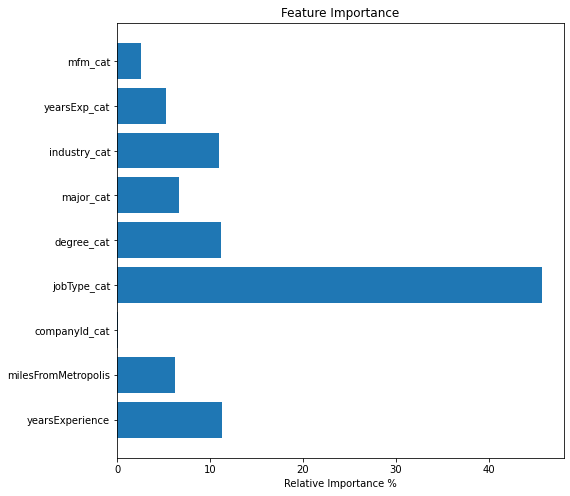

final xgb model saved as ---> final_xgb_model_saved


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09, max_delta_step=0, max_depth=8,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=2,
             reg_alpha=20, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [5]:
#functions combines cleaning, prepocessing and modelling
combined_proc_modelling(train_features_link, train_target_link) #function included in helper file

In [6]:
test_features_link = "DSDJ-data-SalaryPredictions/data/test_features.csv"

In [7]:
#function processes test data and predicts salary value and exports results as csv file
process_predict_pipe("DSDJ-data-SalaryPredictions/data/test_features.csv")  #function included in helper file

Checking if case in feature values are uniform
jobId ---> All upppercase
companyId ---> All upppercase
jobType ---> All upppercase
degree ---> All upppercase
major ---> All upppercase
industry ---> All upppercase

jobId  dropped
Data encoded
yearsExperience  values binned
milesFromMetropolis  values binned
Predictions saved as csv to --->  predicted_salary.csv


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,predicted_salary
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,112.0
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,90.0
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,182.0
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,105.0
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,113.0
...,...,...,...,...,...,...,...,...,...
999995,JOB1362686407682,COMP54,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3,167.0
999996,JOB1362686407683,COMP5,MANAGER,NONE,NONE,HEALTH,20,67,109.0
999997,JOB1362686407684,COMP61,JANITOR,NONE,NONE,OIL,1,91,55.0
999998,JOB1362686407685,COMP19,CTO,DOCTORAL,MATH,OIL,14,63,163.0
